In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random as r 
import seaborn as sn
from math import trunc

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "c8iPOfqAcm1qys97q3RW0wKOM"
consumer_secret = "6sUoqS7FtJkIKTfdoWaZHEf5quOEeqAfrJLsSJMzJd2Aw1myoF"
access_token = "229598666-EnGXtgqnFXT8zjHrMTI7medln9PlPdT5thbQhjJh"
access_token_secret = "Bdr3ujJgJqgf6wksE2b8OQ7CxkFTCAi5KolqLZrc9giNH"

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User Accounts
target_user = ('@BBC', '@CBS', '@CNN', '@Fox', '@New York times')
#target_user = ('@CNN')

In [5]:
# A list to hold tweet timestamps
tweet_times = []
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
time_list = []
    
# Loop through each user
for user in target_user:
    
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(5):
        public_tweets = api.user_timeline(user)
        
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate array
            user_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

# Adding all the tweets into an Array

news_data = pd.DataFrame({'Agency': user_list, 'Compound': compound_list,'Positive': positive_list,
                            'Neutral':neutral_list,'Negative':negative_list})


In [6]:
news_data

Agency  Compound  Negative  Neutral  Positive
0               @BBC   -0.3167     0.178    0.704     0.117
1               @BBC   -0.6908     0.227    0.773     0.000
2               @BBC    0.0000     0.000    1.000     0.000
3               @BBC    0.3612     0.000    0.872     0.128
4               @BBC    0.7545     0.000    0.705     0.295
5               @BBC   -0.6399     0.211    0.725     0.065
6               @BBC    0.9059     0.000    0.533     0.467
7               @BBC    0.0000     0.000    1.000     0.000
8               @BBC    0.5574     0.095    0.655     0.250
9               @BBC   -0.3612     0.128    0.872     0.000
10              @BBC    0.7506     0.000    0.610     0.390
11              @BBC    0.4588     0.000    0.842     0.158
12              @BBC    0.3200     0.110    0.696     0.194
13              @BBC    0.4812     0.056    0.778     0.166
14              @BBC    0.0000     0.000    1.000     0.000
15              @BBC    0.7269     0.000    0.757     0.243
16              @BBC    0.0000     0.000    1.000     0.000
17              @BBC   -0.4939     0.151    0.849     0.000
18              @BBC   -0.5090     0.135    0.865     0.000
19              @BBC    0.0000     0.000    1.000     0.000
20              @BBC   -0.3167     0.178    0.704     0.117
21              @BBC   -0.6908     0.227    0.773     0.000
22              @BBC    0.0000     0.000    1.000     0.000
23              @BBC    0.3612     0.000    0.872     0.128
24              @BBC    0.7545     0.000    0.705     0.295
25              @BBC   -0.6399     0.211    0.725     0.065
26              @BBC    0.9059     0.000    0.533     0.467
27              @BBC    0.0000     0.000    1.000     0.000
28              @BBC    0.5574     0.095    0.655     0.250
29              @BBC   -0.3612     0.128    0.872     0.000
..               ...       ...       ...      ...       ...
470  @New York times    0.0000     0.000    1.000     0.000
471  @New York times    0.0000     0.000    1.000     0.000
472  @New York times    0.0000     0.000    1.000     0.000
473  @New York times    0.0000     0.000    1.000     0.000
474  @New York times    0.0000     0.000    1.000     0.000
475  @New York times    0.4588     0.000    0.250     0.750
476  @New York times    0.8807     0.000    0.595     0.405
477  @New York times    0.5574     0.000    0.783     0.217
478  @New York times    0.6705     0.000    0.476     0.524
479  @New York times    0.7824     0.000    0.623     0.377
480  @New York times    0.0000     0.000    1.000     0.000
481  @New York times    0.0000     0.000    1.000     0.000
482  @New York times    0.0000     0.000    1.000     0.000
483  @New York times    0.0000     0.000    1.000     0.000
484  @New York times    0.0000     0.000    1.000     0.000
485  @New York times    0.0000     0.000    1.000     0.000
486  @New York times    0.0000     0.000    1.000     0.000
487  @New York times    0.0000     0.000    1.000     0.000
488  @New York times    0.0000     0.000    1.000     0.000
489  @New York times    0.0000     0.000    1.000     0.000
490  @New York times    0.0000     0.000    1.000     0.000
491  @New York times    0.0000     0.000    1.000     0.000
492  @New York times    0.0000     0.000    1.000     0.000
493  @New York times    0.0000     0.000    1.000     0.000
494  @New York times    0.0000     0.000    1.000     0.000
495  @New York times    0.4588     0.000    0.250     0.750
496  @New York times    0.8807     0.000    0.595     0.405
497  @New York times    0.5574     0.000    0.783     0.217
498  @New York times    0.6705     0.000    0.476     0.524
499  @New York times    0.7824     0.000    0.623     0.377

[500 rows x 5 columns]

In [7]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Agency      500 non-null object
Compound    500 non-null float64
Negative    500 non-null float64
Neutral     500 non-null float64
Positive    500 non-null float64
dtypes: float64(4), object(1)
memory usage: 19.6+ KB


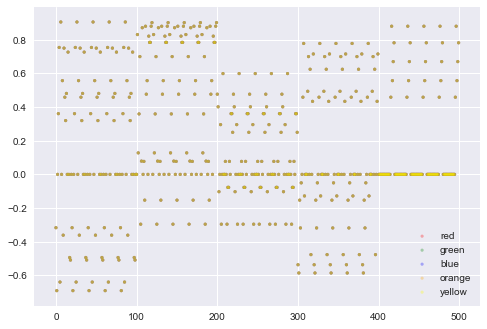

In [8]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue','orange','yellow']:
    
    x = news_data.index
    y = news_data['Compound']
    scale = 10.0 
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In [9]:
news_data[news_data['Agency']== '@CBS']['Compound']

100    0.0000
101    0.8313
102    0.1280
103    0.3595
104    0.7003
105   -0.2960
106    0.0790
107    0.8720
108    0.0000
109    0.0772
110   -0.1531
111    0.8805
112    0.4767
113    0.5574
114    0.0000
115    0.8217
116    0.7845
117    0.7845
118    0.8807
119    0.9022
120    0.0000
121    0.8313
122    0.1280
123    0.3595
124    0.7003
125   -0.2960
126    0.0790
127    0.8720
128    0.0000
129    0.0772
        ...  
170   -0.1531
171    0.8805
172    0.4767
173    0.5574
174    0.0000
175    0.8217
176    0.7845
177    0.7845
178    0.8807
179    0.9022
180    0.0000
181    0.8313
182    0.1280
183    0.3595
184    0.7003
185   -0.2960
186    0.0790
187    0.8720
188    0.0000
189    0.0772
190   -0.1531
191    0.8805
192    0.4767
193    0.5574
194    0.0000
195    0.8217
196    0.7845
197    0.7845
198    0.8807
199    0.9022
Name: Compound, Length: 100, dtype: float64

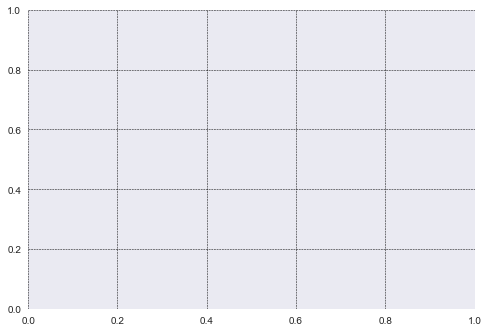

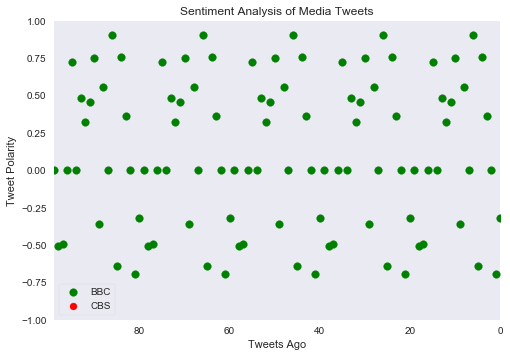

In [23]:
compound = news_data[news_data['Agency'] == '@BBC'].index

ax = plt.subplots()
fig = plt.figure()
#ax.figure(figsize=(12,8))
#ax = plt.scatter(news_data[news_data['Agency'] == '@BBC'].index,news_data[news_data['Agency']=='@BBC']['Compound'], marker ='o', s = 60, color='g', label = 'BBC')
#ax = plt.scatter(news_data[news_data['Agency'] == '@CBS'].index,news_data[news_data['Agency']=='@CBS']['Compound'], marker ='o', color='r', label = 'CBS')
#plt.scatter(news_data[news_data['Agency'] == '@CNN'].index,news_data[news_data['Agency']=='@CNN']['Compound'],  marker ='o', color='y', label = 'CNN')
#plt.scatter(news_data[news_data['Agency'] == '@FOX'], news_data[news_data['Agency']=='@FOX']['Compound'],  marker ='o', color='b', label = 'FOX')
#plt.scatter(news_data[news_data['Agency'] == '@New York Times'], news_data[news_data['Agency']=='@New York Times']['Compound'], marker ='o', color='m', label = 'New York times')

ax1 = fig.add_subplot(111)

ax1.scatter(news_data[news_data['Agency'] == '@BBC'].index,news_data[news_data['Agency']=='@BBC']['Compound'], marker ='o', s = 60, color='g', label = 'BBC')
ax1.scatter(news_data[news_data['Agency'] == '@CBS'].index,news_data[news_data['Agency']=='@CBS']['Compound'], marker ='o', color='r', label = 'CBS')
plt.legend(loc='upper left');

plt.gca().set(xlabel = 'Tweets Ago', ylabel = 'Tweet Polarity',title = 'Sentiment Analysis of Media Tweets',xlim = (max(compound),0), ylim = (-1,1))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()


In [11]:
Compound_percentage =  news_data.groupby('Agency').mean()['Compound'].to_frame("% Compound")
Compound_percentage

% Compound
Agency                     
@BBC               0.115250
@CBS               0.434320
@CNN               0.102585
@Fox               0.097860
@New York times    0.167490

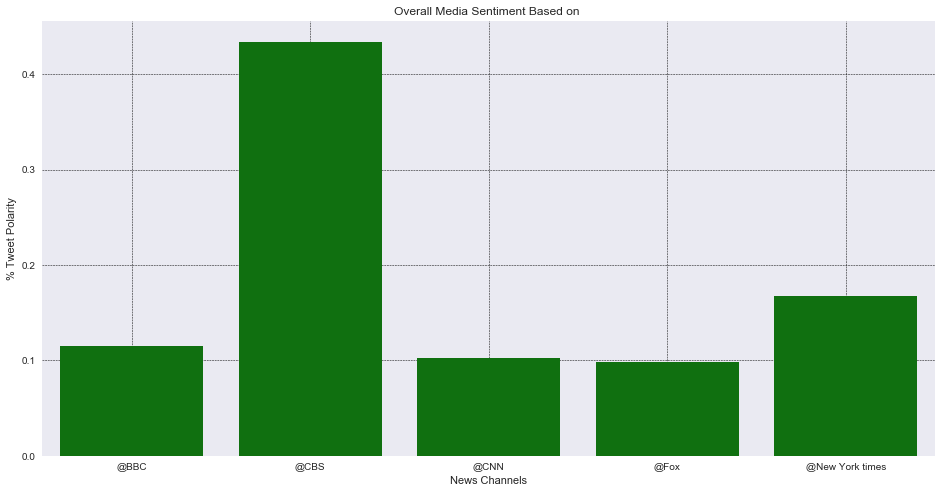

In [24]:
x=Compound_percentage.index
y=Compound_percentage['% Compound']
plt.figure(figsize=(16,8))
colors = ['green' if _y >=0.0 else 'red' for _y in y]
ax = sn.barplot(x, y, palette=colors)

plt.gca().set(xlabel='News Channels', ylabel='% Tweet Polarity', title='Overall Media Sentiment Based on ')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()

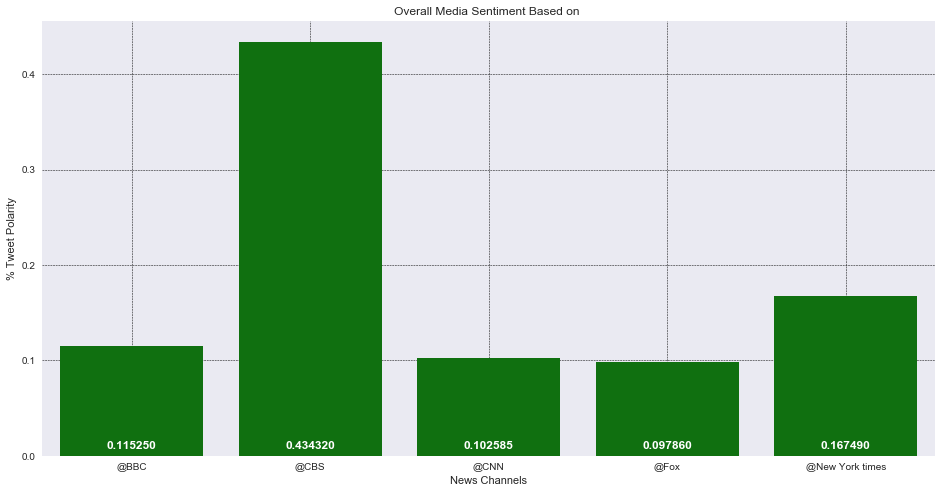

In [28]:
x=Compound_percentage.index
y=Compound_percentage['% Compound']
plt.figure(figsize=(16,8))
colors = ['green' if _y >=0.0 else 'red' for _y in y]
ax = sn.barplot(x, y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0.0:
        ax.annotate(
            s='{:f}'.format(_y), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:f}'.format(_y), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  
plt.gca().set(xlabel='News Channels', ylabel='% Tweet Polarity', title='Overall Media Sentiment Based on ')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()